In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import integrate
from sauron_colormap import sauron
import pandas as pd
import math

In [2]:
def smooth_mask(cube,beam,chans2look,rmsfac=3):
    mask=ndimage.uniform_filter(cube,size=[4,beam*1.5,beam*1.5])
    quart=np.floor(np.array(cube.shape)/8.).astype(np.int)
    half=np.floor(np.array(cube.shape)/2.).astype(np.int)
    #print(half, quart)
    rms=np.nanstd(mask[chans2look[0]:chans2look[1],half[1]-quart[1]:half[1]+quart[1],half[2]-quart[2]:half[2]+quart[2]])
    return mask>rms*rmsfac

In [248]:
def spectrum(cube):
    spec=np.nansum(np.nansum(cube,axis=1),axis=1)
    return spec

In [249]:
param=pd.read_csv('/home/jacob/Documents/CARS/Cars_parameters.csv')
cs=param[param['Line']=='CS']
hco=param[param['Line']=='HCO+']
hcn=param[param['Line']=='HCN']

In [250]:
csflux=[]
cserr=[]
for i in range(len(cs['Galaxy & Line'])):
    cspath=cs['File Path']
    csfilepath=np.array(cspath)
    csbeam=np.array(cs['Beam Size'])
    csminh=np.array(cs['Height Min'])
    csmaxh=np.array(cs['Height Max'])
    csminw=np.array(cs['Width Min'])
    csmaxw=np.array(cs['Width Max'])
    csminchn=np.array(cs['Min Chan'])
    csmaxchn=np.array(cs['Max Chan'])
    csnchan=np.array(cs['Nchan'])
    cschnwdth=np.array(cs['Channel Width'])
    csrms=np.array(cs['RMS'])
    hducs=fits.open(csfilepath[i])
    datacs=hducs[0].data
    datancs=np.squeeze(datacs)
    datanancs=np.nan_to_num(datancs)
    databeamcs=datanancs*csbeam[i]
    speccs=spectrum(databeamcs[csminchn[i]:csmaxchn[i],csminh[i]:csmaxh[i],csminw[i]:csmaxw[i]])
    csint=np.sum(speccs)*cschnwdth[i]
    csflux.append(csint)
    cserror=np.sqrt(csnchan[i])*csbeam[i]*csrms[i]*cschnwdth[i]
    cserr.append(cserror)

In [251]:
hcoflux=[]
hcoerr=[]
for i in range(len(hco['Galaxy & Line'])):
    hcopath=hco['File Path']
    hcofilepath=np.array(hcopath)
    hcobeam=np.array(hco['Beam Size'])
    hcominh=np.array(hco['Height Min'])
    hcomaxh=np.array(hco['Height Max'])
    hcominw=np.array(hco['Width Min'])
    hcomaxw=np.array(hco['Width Max'])
    hcominchn=np.array(hco['Min Chan'])
    hcomaxchn=np.array(hco['Max Chan'])
    hconchan=np.array(hco['Nchan'])
    hcochnwdth=np.array(hco['Channel Width'])
    hcorms=np.array(hco['RMS'])
    hduhco=fits.open(hcofilepath[i])
    datahco=hduhco[0].data
    datanhco=np.squeeze(datahco)
    datananhco=np.nan_to_num(datanhco)
    databeamhco=datananhco*hcobeam[i]
    spechco=spectrum(databeamhco[hcominchn[i]:hcomaxchn[i],hcominh[i]:hcomaxh[i],hcominw[i]:hcomaxw[i]])
    hcoint=np.sum(spechco)*hcochnwdth[i]
    hcoflux.append(hcoint)
    hcoerror=np.sqrt(hconchan[i])*hcobeam[i]*hcorms[i]*hcochnwdth[i]
    hcoerr.append(hcoerror)

In [252]:
hcnflux=[]
hcnerr=[]
for i in range(len(hcn['Galaxy & Line'])):
    hcnpath=hcn['File Path']
    hcnfilepath=np.array(hcnpath)
    hcnbeam=np.array(hcn['Beam Size'])
    hcnminh=np.array(hcn['Height Min'])
    hcnmaxh=np.array(hcn['Height Max'])
    hcnminw=np.array(hcn['Width Min'])
    hcnmaxw=np.array(hcn['Width Max'])
    hcnminchn=np.array(hcn['Min Chan'])
    hcnmaxchn=np.array(hcn['Max Chan'])
    hcnnchan=np.array(hcn['Nchan'])
    hcnchnwdth=np.array(hcn['Channel Width'])
    hcnrms=np.array(hcn['RMS'])
    hduhcn=fits.open(hcnfilepath[i])
    datahcn=hduhcn[0].data
    datanhcn=np.squeeze(datahcn)
    datananhcn=np.nan_to_num(datanhcn)
    databeamhcn=datananhcn*hcnbeam[i]
    spechcn=spectrum(databeamhcn[hcnminchn[i]:hcnmaxchn[i],hcnminh[i]:hcnmaxh[i],hcnminw[i]:hcnmaxw[i]])
    hcnint=np.sum(spechcn)*hcnchnwdth[i]
    hcnflux.append(hcnint)
    hcnerror=np.sqrt(hcnnchan[i])*hcnbeam[i]*hcnrms[i]*hcnchnwdth[i]
    hcnerr.append(hcnerror)

In [253]:
hcnhcoerrmax=[]
hcnhcoerrmin=[]
for i in range(len(hcn['Galaxy & Line'])):
    hcn_hcoerr=(hcnflux[i]+np.random.normal(0,hcnerr[i],1000))/(hcoflux[i]+np.random.normal(0,hcoerr[i],1000))
    lowerhco=np.percentile(hcn_hcoerr,16)
    upperhco=np.percentile(hcn_hcoerr,84)
    hcnhcoerrmax.append(upperhco)
    hcnhcoerrmin.append(lowerhco)

In [254]:
hcncserrmax=[]
hcncserrmin=[]
for i in range(len(cs['Galaxy & Line'])):
    hcn_cserr=(hcnflux[i]+np.random.normal(0,hcnerr[i],1000))/(csflux[i]+np.random.normal(0,cserr[i],1000))
    lowercs=np.percentile(hcn_cserr,16)
    uppercs=np.percentile(hcn_cserr,84)
    hcncserrmax.append(uppercs)
    hcncserrmin.append(lowercs)

In [255]:
iz=pd.read_csv('/home/jacob/Documents/Izumi.csv')

In [260]:
AGN=iz[iz['Type']=='AGN']
SB=iz[iz['Type']=='SB']
hcn_hco=np.array(hcnflux)/np.array(hcoflux)
hcn_cs=np.array(hcnflux)/np.array(csflux)

Text(0, 0.5, 'HCN/CS')

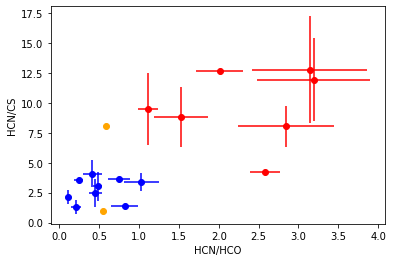

In [261]:
plt.plot(AGN['HCN/HCO'],AGN['HCN/CS'],'o',color='red')
plt.errorbar(AGN['HCN/HCO'],AGN['HCN/CS'],xerr=AGN['Error1'],yerr=AGN['Error2'],fmt='none',ecolor='red')
plt.plot(SB['HCN/HCO'],SB['HCN/CS'],'o',color='blue')
plt.errorbar(SB['HCN/HCO'],SB['HCN/CS'],xerr=SB['Error1'],yerr=SB['Error2'],fmt='none',ecolor='blue')
plt.plot(hcn_hco,hcn_cs,'o',color='orange')
plt.hlines(hcn_cs,hcnhcoerrmax,hcnhcoerrmin,color='orange')
plt.vlines(hcn_hco,hcncserrmax,hcncserrmin,color='orange')
plt.xlabel('HCN/HCO')
plt.ylabel('HCN/CS')